### Animation

This notebook was just started, not finished
<br>Goal - explore animation effects to achive something similar to https://valis.pub
<br>Below we try matplotlib.animation
<br>Also look at 
- https://github.com/arunprasaad2711 
- https://www.youtube.com/watch?v=K2tC9nsloLw 

In [1]:
%%capture
# Cell magic command "%%capture" captures the stdout/stderr of a cell.
# This allows you to either discard these streams or store them in a variable.
# If you specify a name, then stdout/stderr will be stored in an object in your namespace.

# Important to set backend to notebook if we run it in Jupyter
%matplotlib notebook

import os, sys
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
_ = plt.clf()

In [2]:
%%capture
plt.rcParams["animation.html"] = "jshtml"
fig, ax = plt.subplots(figsize=(4,2))
h = ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

In [3]:
t = np.linspace(0,2*np.pi)
x = np.sin(t)

def animate(i):
    l.set_data(t[:i], x[:i])

print("\nUse scrollbar and buttons to see output")
display(matplotlib.animation.FuncAnimation(fig, animate, frames=len(t)))


Use scrollbar and buttons to see output


In [4]:
%%capture
_ = plt.clf()

<IPython.core.display.Javascript object>


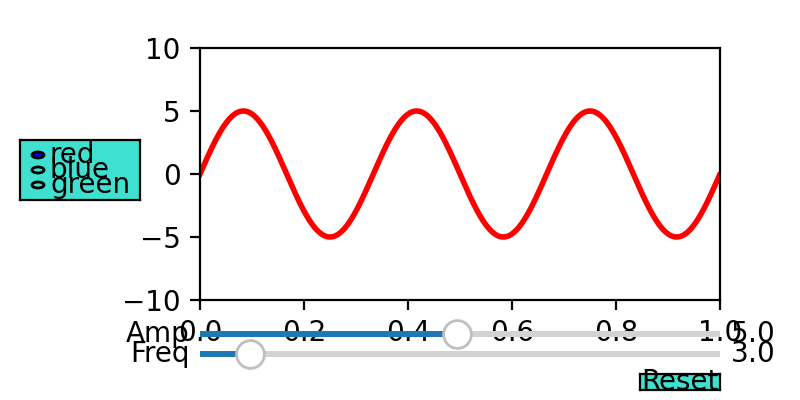

In [5]:
# Example showing using scrollbar and buttons

# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots(figsize=(4,2))
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5 # amplitude
f0 = 3 # frequency
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red') # returns list of lines
plt.axis([0, 1, -10, 10]) # x1,x2,y1,y2

# ----------------------------------------
# draw yellow toolbar using [shift_x, shift_y, width, height]
# see colors names here - https://matplotlib.org/stable/gallery/color/named_colors.html
# axcolor = 'lightgoldenrodyellow'
# axcolor = 'lightblue'
axcolor = 'turquoise'

axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor) # Frequency
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor) # Amplitude

# ----------------------------------------
# define sliders inside yellow toolbars
sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0) # Frequency
samp  = Slider(axamp , 'Amp' , 0.1, 10.0, valinit=a0) # Amplitude


# ----------------------------------------
def update(val):
    amp  = samp.val   # get amplitude from slider
    freq = sfreq.val  # get frequency from slider
    l.set_ydata(amp*np.sin(2*np.pi*freq*t)) # recalculate line
    fig.canvas.draw_idle() # draw canvas

# redraw canvas when sliders are moved
sfreq.on_changed(update)
samp.on_changed(update)

# ----------------------------------------
# add reset button [shift_x, shift_y, width, height]
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

# ----------------------------------------
# add radio buttons to change colors
rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)

def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

# ----------------------------------------
_ = plt.show()